In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set()
sns.set_style("whitegrid")

In [67]:
data_dir = Path(".").absolute().parent / "data"
fig_dir = Path(".").absolute().parent / "figs"

group_names = ("chronic_citalopram", 
                           "chronic_saline", 
                           "chronic_saline_", 
                           "citalopram_continuation", 
                           "citalopram_discontinuation")

dfb = (
    pd.read_csv(data_dir / "baseline.csv")
    .loc[lambda x: 
         (x["group_name"].isin(group_names)
        ) & (
         x["cluster"] != "no_baseline")]
    .assign(group= 
            lambda x: x["group_name"].map({"chronic_saline": "CS",
                                          "chronic_saline_": "CS",
                                          "citalopram_continuation": "CC",
                                          "chronic_citalopram": "CC",
                                          "citalopram_discontinuation": "CD"})
           )
)
dfz = (
    pd.read_csv(data_dir / "cit_zscores.csv")
    .merge(dfb[["neuron_id", "group"]])
    .loc[lambda x: x.bin < (60*20)]
    .assign(time=lambda x: x.bin.divide(60),
           zsmoothed=lambda x: x.groupby("neuron_id")["zscore"].transform(lambda x: gaussian_filter1d(x, sigma=1)))
)

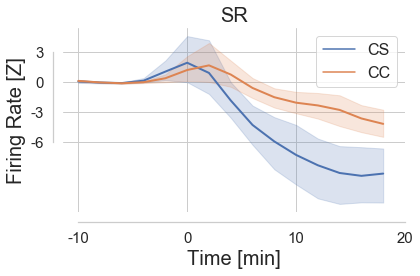

In [68]:
plt.rc('legend',fontsize=16)
f, ax = plt.subplots()
(
    dfz
    .loc[lambda x: x.group.isin(["CS", "CC"])]
    .loc[lambda x: x.cluster == "slow_regular"]
    .pipe(lambda x: sns.lineplot(data=x, x="time", y="zsmoothed", hue="group", n_boot=500, ci=90, ax=ax, linewidth=2))
)

ax.set_ylabel("Firing Rate [Z]", fontsize=20)
ax.set_yticks([-6, -3, 0, 3])


ax.set_xlabel("Time [min]", fontsize=20)
ax.set_xticks([-10, 0, 10, 20])


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)


ax.set_title("SR", fontsize=20)
plt.tight_layout()
# plt.savefig(str(fig_dir / "CITLinesSR_CSvCC.png"), dpi=300, transparent=True)

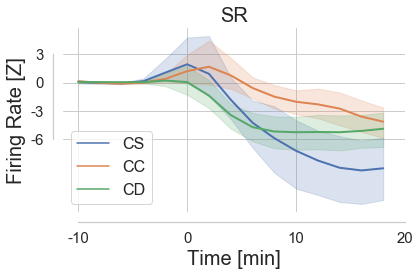

In [71]:
plt.rc('legend',fontsize=16)
f, ax = plt.subplots()
(
    dfz
    .loc[lambda x: x.group.isin(["CS", "CC", "CD"])]
    .loc[lambda x: x.cluster == "slow_regular"]
    .pipe(lambda x: sns.lineplot(data=x, x="time", y="zsmoothed", hue="group", n_boot=500, ci=95, ax=ax, linewidth=2))
)

ax.set_ylabel("Firing Rate [Z]", fontsize=20)
ax.set_yticks([-6, -3, 0, 3])


ax.set_xlabel("Time [min]", fontsize=20)
ax.set_xticks([-10, 0, 10, 20])


sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

ax.set_title("SR", fontsize=20)
plt.tight_layout()
plt.savefig(str(fig_dir / "CITLinesSR_ALL.png"), dpi=300, transparent=True)

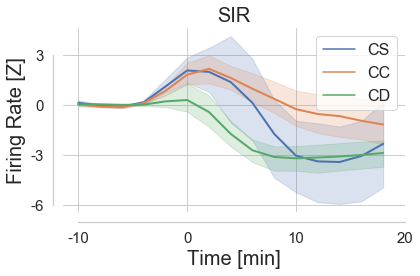

In [70]:
plt.rc('legend',fontsize=16)
f, ax = plt.subplots()
(
    dfz
    .loc[lambda x: x.group.isin(["CS", "CC", "CD"])]
    .loc[lambda x: x.cluster == "slow_irregular"]
    .pipe(lambda x: sns.lineplot(data=x, x="time", y="zsmoothed", hue="group", n_boot=500, ci=90, ax=ax, linewidth=2))
)

ax.set_ylabel("Firing Rate [Z]", fontsize=20)
ax.set_yticks([-6, -3, 0, 3])


ax.set_xlabel("Time [min]", fontsize=20)
ax.set_xticks([-10, 0, 10, 20])


sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

ax.set_title("SIR", fontsize=20)
plt.tight_layout()
plt.savefig(str(fig_dir / "CITLinesSIR_ALL.png"), dpi=300, transparent=True)